[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/estocasticos-udem/curso_2023-1/blob/main/variables_aleatorias_discretas/binomial.ipynb)

In [47]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Distribución binomial

## Ejemplo 1

Cada hijo de un par particular de padres tiene una probabilidad de 0.25 de tener sangre tipo O. La genética dice que los niños reciben genes de cada uno de sus padres de forma independiente. Si estos padres tienen 5 hijos, calcule la probabilidad de que exactamente 3 de los niños tengan sangre tipo O.

El experimento es binomial con:
* **Acierto (S)**: El niño tiene sangre tipo O.
* **Falla (F)**: El niño tiene un tipo de sangre distinto del O (Tipo A, AB o B).

Ahora definamos la VA (Variable aleatoria) $X$ como el Numero de hijos con sangre tipo O. El rango de esta variable esta dado:

$$
x=S_X = \{0, 1, 2, 3, 4, 5\}
$$

Ademas $X \sim Bin(n,p)$ donde segun el enunciado:
* $n = 5$
* $p = 0.25$
* $p = 1 - p = 1- 0.25 = 0.75$



In [48]:
"""
Definición de la VA binomial: X ~ Bin(n,p)

X: Numero de hijos con sangre tipo O
- n: Numero de hijos
- p: 0.25
- q: 1 - p = 0.75
"""
n = 5
p = 0.25
X = stats.binom(n = 5, p = 0.25)

1. Calcule la probabilidad de que exactamente 3 de los niños tengan sangre tipo O.
   
   Se nos pide $P(X = 3)$:

In [49]:
# P(X = 3)
p_3 = X.pmf(3)
print("P(X=3) = {0:0.5f}".format(p_3))

P(X=3) = 0.08789


2. ¿Deberían sorprenderse los padres si más de 3 de sus hijos tienen sangre tipo O? 

In [50]:
# P(X > 3)
p_mayor3 = X.pmf(4) + X.pmf(5)
print("P(X>3) = {0:0.5f}".format(p_mayor3))

P(X>3) = 0.01562


Dado que solo hay un 1,5% de probabilidad de que más de 3 de cada 5 niños tengan sangre tipo O, **¡los padres deberían sorprenderse!**

3. Obtenga la media, la varianza y la desviación estandar.

In [51]:
E = X.mean()      # E = stats.binom.mean(n = 5, p = .25)
V = X.var()       # V = stats.binom.var(n = 5, p = .25)
S = X.std()      # V = stats.binom.var(n = 5, p = .25)

print("- Media: E(X) = {0:2f}".format(E))
print("- Varianza: Var(X) = {0:2f}".format(V))
print("- Desv. estandar: sd(X) = {0:2f}".format(S))

- Media: E(X) = 1.250000
- Varianza: Var(X) = 0.937500
- Desv. estandar: sd(X) = 0.968246


4. Grafique la PFM

In [52]:
x = list(range(n + 1))
pmf = X.pmf(x)
df = pd.DataFrame({"x":x,"pmf":pmf},columns=["x","pmf"])
df

x       pmf
0  0  0.237305
1  1  0.395508
2  2  0.263672
3  3  0.087891
4  4  0.014648
5  5  0.000977

Text(0, 0.5, 'Probabilidad')

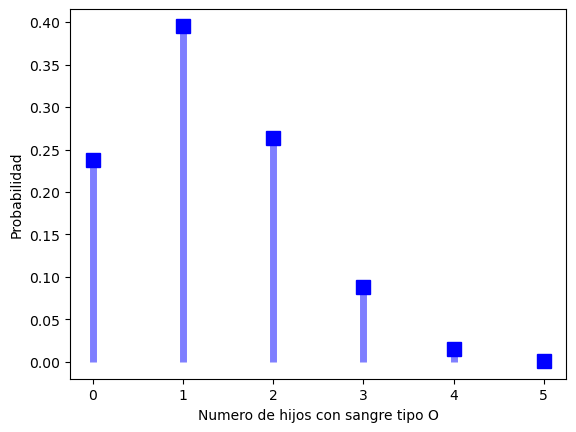

In [53]:
# Grafica
plt.plot(x, pmf, 'bs', ms=10)
plt.vlines(x, 0, pmf, colors='b', lw = 5, alpha=0.5)
plt.xlabel("Numero de hijos con sangre tipo O")
plt.ylabel("Probabilidad")

## Ejemplo 2

Los 21 estudiantes de un curso de calidad del agua hicieron una actividad de laboratorio. Si asumimos que los estudiantes de la clase no pueden distinguir el agua del grifo del agua embotellada, y que cada uno tiene 1/3 de probabilidad de identificar correctamente los diferentes tipos de agua al adivinar.

Sea $Y$ el número de estudiantes que identifican correctamente el vaso que contiene el diferente tipo de agua. Tenemos que $Y \sim Bin(n,p)$ donde:
* $n = 21$
* $p = 1/3$
* $q = 2/3$

In [54]:
n = 21
p = 1/3 

# Definicion del a VA 
Y = stats.binom(n = 21, p = 1/3)
y = np.arange(n+1) # Rango de la VA

# Calculo de la PFM
pmf_y = Y.pmf(y)

# Tabla de la PFM
df = pd.DataFrame(data = {"y":y,"p(y)":pmf_y})
df

y          p(y)
0    0  2.004858e-04
1    1  2.105101e-03
2    2  1.052550e-02
3    3  3.333076e-02
4    4  7.499421e-02
5    5  1.274902e-01
6    6  1.699869e-01
7    7  1.821288e-01
8    8  1.593627e-01
9    9  1.150953e-01
10  10  6.905717e-02
11  11  3.452858e-02
12  12  1.438691e-02
13  13  4.980084e-03
14  14  1.422881e-03
15  15  3.320056e-04
16  16  6.225105e-05
17  17  9.154567e-06
18  18  1.017174e-06
19  19  8.030322e-08
20  20  4.015161e-09
21  21  9.559907e-11

Text(0, 0.5, 'Probabilidad')

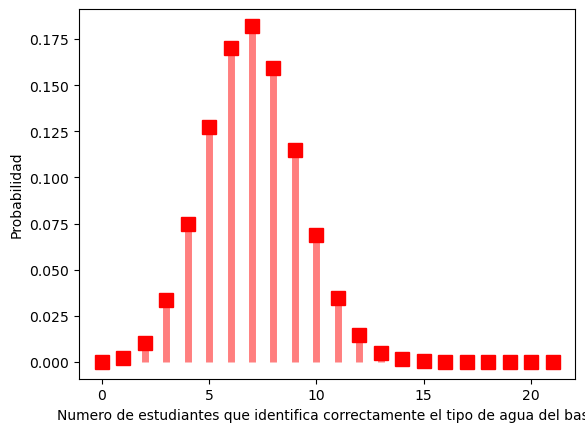

In [59]:
# Grafica
plt.plot(y, pmf_y, 'rs', ms=10)
plt.vlines(y, 0, pmf_y, colors='r', lw = 5, alpha=0.5)
plt.xlabel("Numero de estudiantes que identifica correctamente el tipo de agua del baso")
plt.ylabel("Probabilidad")

In [60]:
# Calculo de l
E_y = Y.mean()      # E_y = stats.binom.mean(n = 21, p = 1/3)
V_y = Y.var()       # V_y = stats.binom.var(n = 21, p = 1/3)
S_y = Y.std()       # S_y = stats.binom.var(n = 21, p = 1/3)

print("- Media: E(X) = {0:2f}".format(E_y))
print("- Varianza: Var(X) = {0:2f}".format(V_y))
print("- Desv. estandar: sd(X) = {0:2f}".format(S_y))

- Media: E(X) = 7.000000
- Varianza: Var(X) = 4.666667
- Desv. estandar: sd(X) = 2.160247
